In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

### Data Understanding

In [187]:
df = pd.read_csv(r'C:\Users\Narmina Mehtiyeva\Desktop\car_price_prediction\car_price_data.csv')

In [188]:
df.head()

,Unnamed: 0,Links,Marka,Model,Year,Color,Engine,Fuel_type,Mileage,Gear_box,New,Price
0,0,https://turbo.az/autos/8989100-bmw-x5,BMW,X5,2015,Göy,2.0,Mühərrik2.0 L / 313 a.g. / Plug-in Hibrid,121 000 km,Avtomat,Xeyr,28 000 USD
1,1,https://turbo.az/autos/9000361-volkswagen-tran...,Volkswagen,Transporter,2018,Qara,2.0,Mühərrik2.0 L / 140 a.g. / Dizel,60 000 km,Avtomat,Xeyr,30 700 USD
2,2,https://turbo.az/autos/9066249-honda-accord,Honda,Accord,2021,Yaş Asfalt,2.0,Mühərrik2.0 L / 212 a.g. / Hibrid,52 000 km,Variator,Xeyr,22 650 USD
3,3,https://turbo.az/autos/9089754-mercedes-c-230,Mercedes,C 230,1999,Qızılı,2.3,Mühərrik2.3 L / 150 a.g. / Benzin,284 000 km,Avtomat,Xeyr,12 450 AZN
4,4,https://turbo.az/autos/9051723-land-rover-rang...,Land Rover,Range Rover,2024,Qara,3.0,Mühərrik3.0 L / 460 a.g. / Plug-in Hibrid,0 km,Avtomat,Bəli,241 300 USD


In [189]:
df.shape

(9960, 12)

In [190]:
df.isnull().sum()

Unnamed: 0    0
Links         0
Marka         0
Model         0
Year          0
Color         0
Engine        0
Fuel_type     0
Mileage       0
Gear_box      0
New           0
Price         0
dtype: int64

### Data Preprocessing

In [191]:
df_new = df.drop(['Unnamed: 0', 'Links'], axis = 1)
mileage_list = list(df_new['Mileage'])
mileage_list = [re.sub(r'\s','', i) for i in mileage_list]
mileage_list = [re.findall(r'\d+', i) for i in mileage_list]
mileage_pd = pd.DataFrame(mileage_list).fillna(0)
mileage_pd = mileage_pd.astype('int32')
df_new['Mileage'] = mileage_pd
price_list = list(df_new['Price'])
price_list = [re.sub(r'\s','', i) for i in price_list]
price_list = [re.findall(r'\d+', i) for i in price_list]
price_pd = pd.DataFrame(price_list).fillna(0)
price_pd = price_pd.astype('int32')
df_new['Price'] = price_pd
fuel_list = list(df_new['Fuel_type'])
fuel_list = [re.findall(r'[A-Z]\w+', i) for i in fuel_list[25:]]
fuel_list = list(df_new['Fuel_type'])
fuel_list = [re.findall(r'[A-Z]\D+', i) for i in fuel_list]
fuel_pd = pd.DataFrame(fuel_list)
fuel_pd.drop(columns=[0,1],axis = 1, inplace = True)
df_new['Fuel_type'] = fuel_pd
# df_new['New'] = df_new['New'].replace({'Bəli': 0, 'Xeyr': 1})

In [192]:
df_new

,Marka,Model,Year,Color,Engine,Fuel_type,Mileage,Gear_box,New,Price
0,BMW,X5,2015,Göy,2.0,Plug-in Hibrid,121000,Avtomat,Xeyr,28000
1,Volkswagen,Transporter,2018,Qara,2.0,Dizel,60000,Avtomat,Xeyr,30700
2,Honda,Accord,2021,Yaş Asfalt,2.0,Hibrid,52000,Variator,Xeyr,22650
3,Mercedes,C 230,1999,Qızılı,2.3,Benzin,284000,Avtomat,Xeyr,12450
4,Land Rover,Range Rover,2024,Qara,3.0,Plug-in Hibrid,0,Avtomat,Bəli,241300
...,...,...,...,...,...,...,...,...,...,...
9955,BYD,Yangwang U8,2024,Qara,2.0,Plug-in Hibrid,5200,Reduktor,Xeyr,158000
9956,Foton,Forland,2004,Ağ,2.3,Dizel,350000,Mexaniki,Xeyr,9500
9957,Toyota,Corolla,2014,Qara,1.6,Benzin,180000,Avtomat,Xeyr,24000
9958,Li Auto,L7,2024,Qara,1.5,Plug-in Hibrid,0,Reduktor,Bəli,52500


### EDA

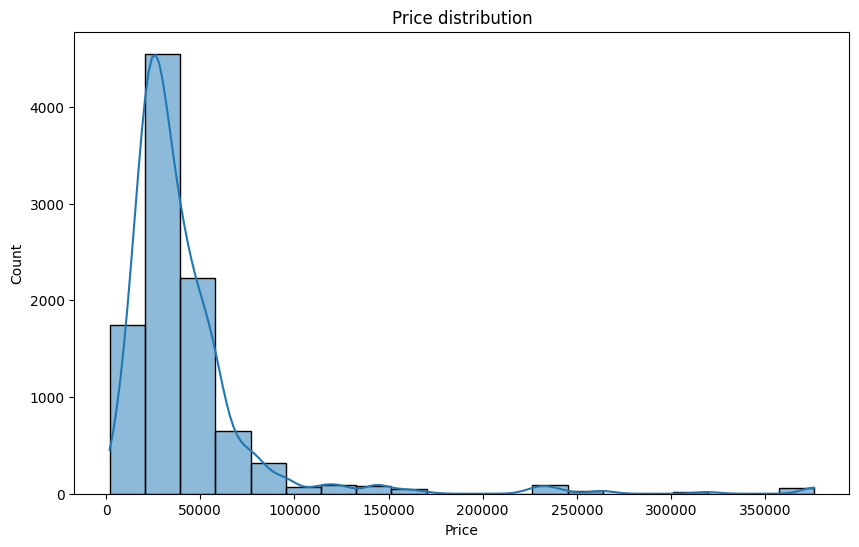

In [193]:
plt.figure(figsize = (10,6))
sns.histplot(df_new['Price'], bins=20, kde = True)
plt.title('Price distribution')
plt.show()

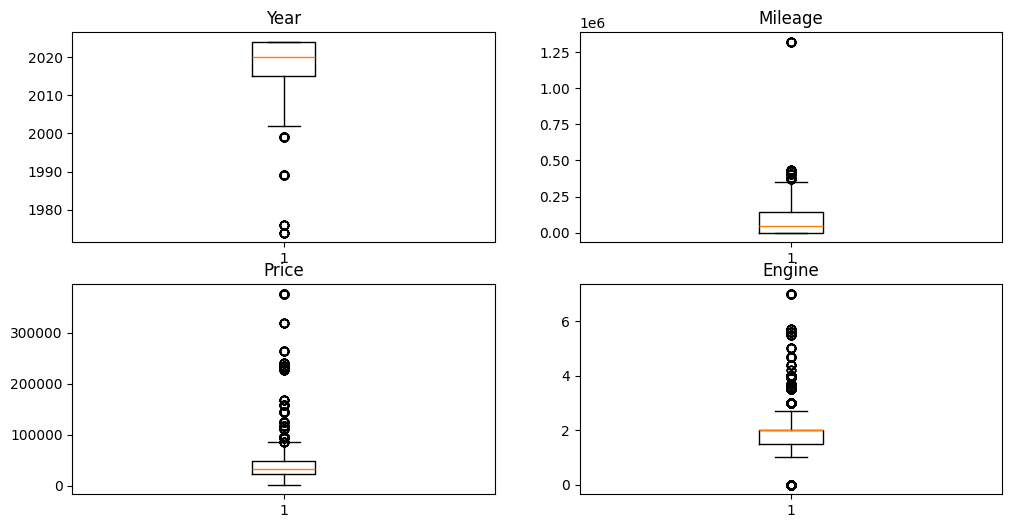

In [194]:
fig, axs = plt.subplots(2, 2, figsize = (12,6))
axs[0, 0].boxplot(df_new['Year'])
axs[1, 1].boxplot(df_new['Engine'])
axs[0, 1].boxplot(df_new['Mileage'])
axs[1, 0].boxplot(df_new['Price'])
axs[0, 0].set_title('Year')
axs[1, 1].set_title('Engine')
axs[0, 1].set_title('Mileage')
axs[1, 0].set_title('Price')
plt.show()

In [195]:
def clean_outliers(col):
    q1 = df_new[col].quantile(0.25)
    q3 = df_new[col].quantile(0.75)
    iqr = q3 - q1 
    outliers = df_new.loc[(df_new[col] < q1 - 1.5 * iqr) | (df_new[col] > q3 + 1.5 * iqr)]
    df_new_clean = df_new.loc[(df_new[col] > q1 - 1.5 * iqr) & (df_new[col] < q3 + 1.5 * iqr)]
    print(f'Outliers in {col}: {len(outliers)}')
    return df_new_clean

In [196]:
numeric_columns = df_new.select_dtypes(include='number').columns
numeric_columns

Index(['Year', 'Engine', 'Mileage', 'Price'], dtype='object')

In [197]:
for col in numeric_columns:
    cleaned_df = clean_outliers(col)    

Outliers in Year: 116
Outliers in Engine: 2065
Outliers in Mileage: 195
Outliers in Price: 560


In [198]:
cleaned_df.shape

(9400, 10)

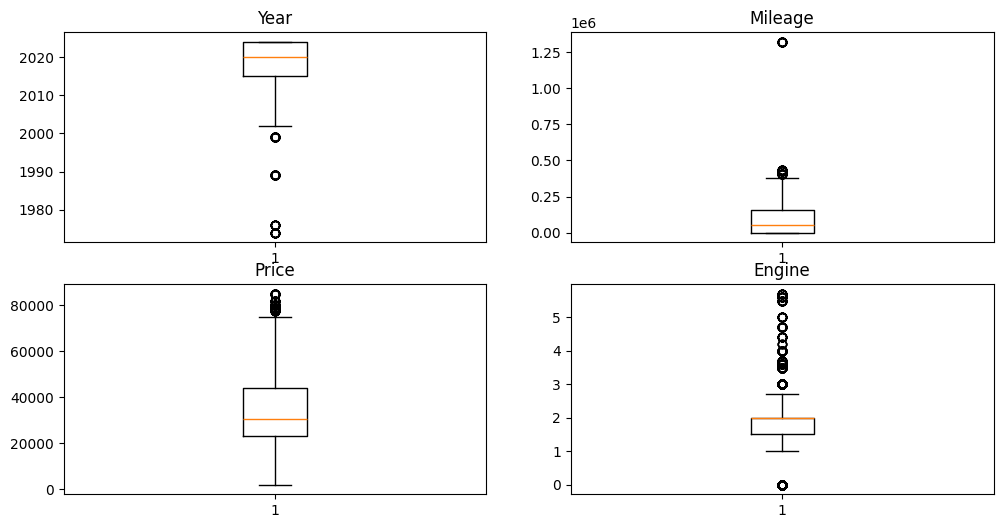

In [199]:
fig, axs = plt.subplots(2, 2, figsize = (12,6))
axs[0, 0].boxplot(cleaned_df['Year'])
axs[1, 1].boxplot(cleaned_df['Engine'])
axs[0, 1].boxplot(cleaned_df['Mileage'])
axs[1, 0].boxplot(cleaned_df['Price'])
axs[0, 0].set_title('Year')
axs[1, 1].set_title('Engine')
axs[0, 1].set_title('Mileage')
axs[1, 0].set_title('Price')
plt.show()

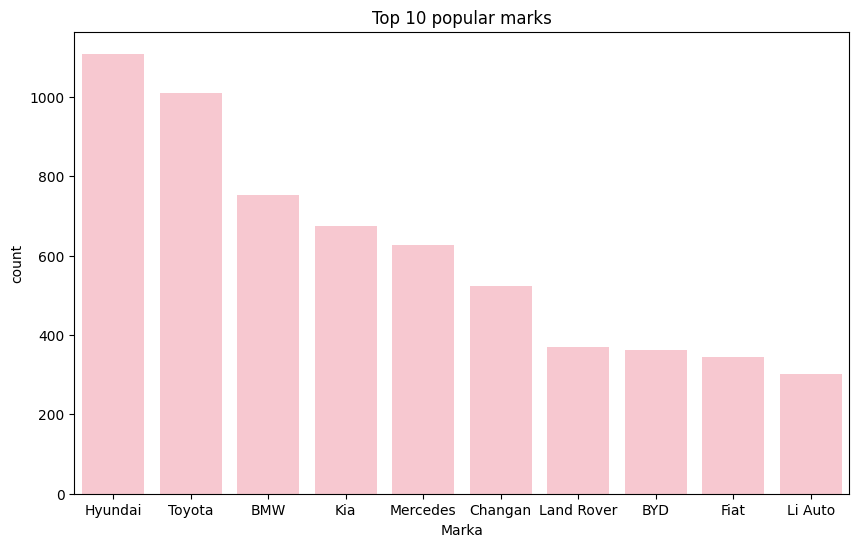

In [200]:
top_10 = cleaned_df['Marka'].value_counts()[:10]
plt.figure(figsize = (10,6))
sns.barplot(top_10, color = 'pink' )
plt.title('Top 10 popular marks')
plt.show()

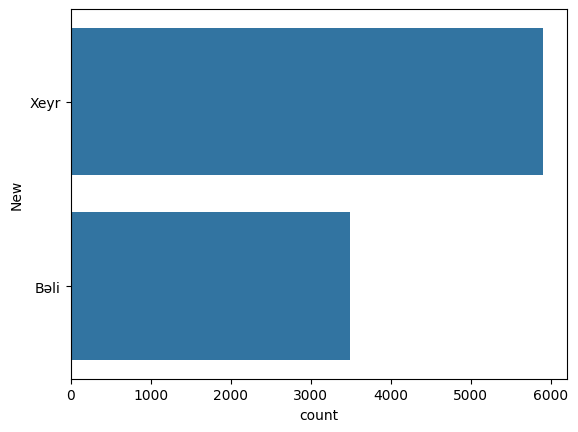

In [201]:
sns.countplot(cleaned_df['New'])
plt.show()

In [166]:
values = cleaned_df['Marka'].value_counts().reset_index()
marks = list(values.loc[values['count'] > 200,'Marka'])

In [202]:
cleaned_df = cleaned_df.loc[cleaned_df['Marka'].isin(marks)]
cleaned_df

,Marka,Model,Year,Color,Engine,Fuel_type,Mileage,Gear_box,New,Price
0,BMW,X5,2015,Göy,2.0,Plug-in Hibrid,121000,Avtomat,Xeyr,28000
3,Mercedes,C 230,1999,Qızılı,2.3,Benzin,284000,Avtomat,Xeyr,12450
5,BMW,530,2008,Qara,3.0,Benzin,291000,Avtomat,Xeyr,21500
6,Hyundai,Elantra,2020,Yaş Asfalt,2.0,Benzin,88514,Avtomat,Xeyr,27900
9,Land Rover,Range Rover,2015,Ağ,5.0,Benzin,45000,Avtomat,Xeyr,61900
...,...,...,...,...,...,...,...,...,...,...
9952,Li Auto,L9,2024,Qara,1.5,Plug-in Hibrid,0,Reduktor,Bəli,65500
9953,Mercedes,E 200,2019,Qara,2.0,Benzin,116000,Avtomat,Xeyr,38500
9954,Toyota,Aqua,2019,Ağ,1.5,Hibrid,28000,Variator,Xeyr,21600
9957,Toyota,Corolla,2014,Qara,1.6,Benzin,180000,Avtomat,Xeyr,24000


In [203]:
#Label encoding
label_encoder = preprocessing.LabelEncoder() 
cleaned_df['New']= label_encoder.fit_transform(cleaned_df['New']) 
cleaned_df['Gear_box']= label_encoder.fit_transform(cleaned_df['Gear_box']) 
cleaned_df['Fuel_type']= label_encoder.fit_transform(cleaned_df['Fuel_type']) 
cleaned_df['Color']= label_encoder.fit_transform(cleaned_df['Color']) 
#One-Hot encoding
cleaned_df = pd.get_dummies(cleaned_df, columns=['Marka','Model'], dtype = 'int')

In [204]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6890 entries, 0 to 9958
Columns: 115 entries, Year to Model_ix35
dtypes: float64(1), int32(2), int64(112)
memory usage: 6.0 MB


In [205]:
cleaned_df

,Year,Color,Engine,Fuel_type,Mileage,Gear_box,New,Price,Marka_BMW,Marka_BYD,...,Model_Tipo,Model_Tucson,Model_Uni-K,Model_Vito 116,Model_X5,Model_X6,Model_X70C-DM,Model_X90 PLUS,Model_i30,Model_ix35
0,2015,4,2.0,3,121000,0,1,28000,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1999,9,2.3,0,284000,0,1,12450,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2008,7,3.0,0,291000,0,1,21500,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2020,12,2.0,0,88514,0,1,27900,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2015,1,5.0,0,45000,0,1,61900,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9952,2024,7,1.5,3,0,2,0,65500,0,0,...,0,0,0,0,0,0,0,0,0,0
9953,2019,7,2.0,0,116000,0,1,38500,0,0,...,0,0,0,0,0,0,0,0,0,0
9954,2019,1,1.5,2,28000,4,1,21600,0,0,...,0,0,0,0,0,0,0,0,0,0
9957,2014,7,1.6,0,180000,0,1,24000,0,0,...,0,0,0,0,0,0,0,0,0,0
